In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
from collections import Counter
import re

%matplotlib inline

In [106]:
!pip install langdetect
from langdetect import detect

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [110]:
data_path = '../scrapers/data.json'
data_path = os.path.abspath(os.path.join(data_path))
data_path

'/home/stanislav/my_projects/JoBERTa/scrapers/data.json'

In [119]:
df = pd.read_json(data_path).drop_duplicates(inplace=False)
df['published'] = df['published'].apply(lambda x: int(re.match('\d+',x)[0]))
df = df.sort_values(by='published')
df.head(20)

,title,published,easy_apply,url,description
105,Data Scientist,2,False,https://www.glassdoor.com/job-listing/data-sci...,Explorium is a cutting-edge data science compa...
202,None,2,False,https://www.glassdoor.com/job-listing/data-sci...,
58,Data Scientist,2,False,https://www.glassdoor.com/job-listing/data-sci...,Explorium is a cutting-edge data science compa...
318,Data Scientist,2,False,https://www.glassdoor.com/job-listing/data-sci...,Explorium is a cutting-edge data science compa...
90,Data Scientist,2,False,https://www.glassdoor.com/job-listing/data-sci...,Explorium is a cutting-edge data science compa...
172,Data Scientist,2,False,https://www.glassdoor.com/job-listing/data-sci...,Explorium is a cutting-edge data science compa...
220,Data Scientist,2,False,https://www.glassdoor.com/job-listing/data-sci...,Explorium is a cutting-edge data science compa...
140,Data Scientist,2,False,https://www.glassdoor.com/job-listing/data-sci...,Explorium is a cutting-edge data science compa...
367,Data Scientist,2,False,https://www.glassdoor.com/job-listing/data-sci...,Explorium is a cutting-edge data science compa...
3,Data Scientist,2,False,https://www.glassdoor.com/job-listing/data-sci...,Explorium is a cutting-edge data science compa...


In [102]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 517 to 38
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        119 non-null    object
 1   published    119 non-null    int64 
 2   easy_apply   119 non-null    bool  
 3   url          119 non-null    object
 4   description  119 non-null    object
dtypes: bool(1), int64(1), object(3)
memory usage: 4.8+ KB


In [103]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return None
    
df['language'] = df['description'].apply(lambda x: detect_language(x))
df = df[df['language']=='en']
df.shape

(99, 6)

In [104]:
positions = Counter(df['title'])
positions.most_common(10)

[('Data Scientist', 17),
 ('Software Engineer', 16),
 ('Machine Learning Engineer', 9),
 ('Machine Learning Software Engineer', 2),
 ('Python Developer', 2),
 ('Vulnerability Researcher', 2),
 ('Senior Researcher', 2),
 ('Applied Researcher', 1),
 ('Machine Learning/Deep Learning algorithms', 1),
 ('Internship Opportunities for Students: Data science/Researcher', 1)]

<BarContainer object of 58 artists>

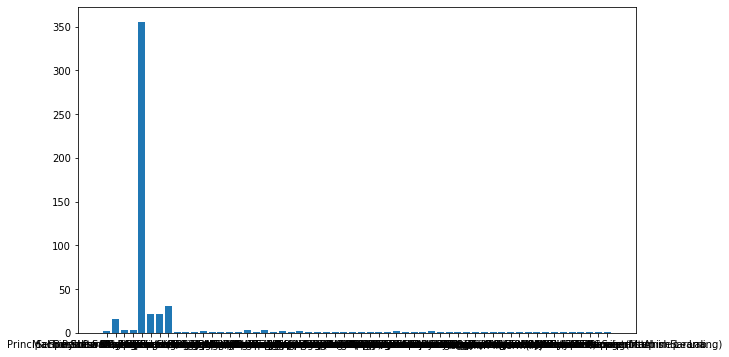

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=list(positions.keys()),height=list(positions.values()))